In [2]:
#importing basics libraries
import pandas as pd
import numpy as np
%matplotlib inline


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("C:\\Users\\A Madhu\\Downloads\\penguins.csv")

In [5]:
df.head(10)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [6]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [7]:
df.shape

(344, 9)

In [8]:
#2.Check for missing values
df.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cols = df.select_dtypes(include=["object"])

for col in cols:
    df[col] = labelencoder.fit_transform(df[col])

In [10]:
df['sex'] = df['sex'].fillna(df['sex'].mean())

In [11]:
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())

In [12]:
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())

In [13]:
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())

In [14]:
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    int32  
 2   island             344 non-null    int32  
 3   bill_length_mm     344 non-null    float64
 4   bill_depth_mm      344 non-null    float64
 5   flipper_length_mm  344 non-null    float64
 6   body_mass_g        344 non-null    float64
 7   sex                344 non-null    int32  
 8   year               344 non-null    int64  
dtypes: float64(4), int32(3), int64(2)
memory usage: 20.3 KB


In [16]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score



In [18]:
# Split features and target variable
x = df.drop('species', axis=1)  # Features
y = df['species']  # Target variable

In [19]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [21]:
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))

1.0
1.0


In [22]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=2)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [23]:
print(dtree.score(x_train,y_train))
print(dtree.score(x_test,y_test))

1.0
1.0


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
xscaled=x.apply(zscore)
xscaled.describe()

,rowid,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02
mean,5.809307e-18,-1.610469e-16,-7.849019e-16,4.318251e-16,-4.902409e-16,1.458781e-16,1.323231e-17,7.688940e-14
std,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00
min,-1.727023e+00,-9.140204e-01,-2.174858e+00,-2.060444e+00,-2.065333e+00,-1.880837e+00,-9.900669e-01,-1.259316e+00
25%,-8.635115e-01,-9.140204e-01,-8.548868e-01,-7.889322e-01,-7.796428e-01,-8.162745e-01,-9.900669e-01,-1.259316e+00
50%,0.000000e+00,4.650279e-01,6.035444e-02,7.569585e-02,-2.796522e-01,-1.900612e-01,8.024753e-01,-3.557390e-02
75%,8.635115e-01,4.650279e-01,8.422188e-01,7.877425e-01,8.631834e-01,6.866374e-01,8.024753e-01,1.188168e+00
max,1.727023e+00,1.844076e+00,2.884265e+00,2.211836e+00,2.148873e+00,2.627899e+00,2.595017e+00,1.188168e+00


In [25]:
NNH=KNeighborsClassifier(n_neighbors=5)
NNH.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
print(dtree.score(x_train,y_train))
print(dtree.score(x_test,y_test))

1.0
1.0


In [27]:
#confusion matrix
from sklearn import metrics
predictions=dtree.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[32,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 24]], dtype=int64)

In [28]:
#precision and recall
predictions = dtree.predict(x_test)
print( precision_score(y_test, predictions, 
                                           pos_label='positive',
                                           average='micro'))
print(recall_score(y_test, predictions, 
                                           pos_label='positive',
                                           average='micro'))

1.0
1.0


In [29]:
# Define a list of models
models = [reg, NNH, dtree,]
model_names = ['Logistic Regression', 'KNeighborsClassifier', 'DecisionTreeClassifier']


In [30]:
best_accuracy = 0
best_model_name = ""

# Loop through each model
for model, name in zip(models, model_names):
    # Make predictions
    predictions = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Print accuracy for each model
    print(f"Model: {name}, Accuracy: {accuracy}")
    
    # Check if this model has better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name

# Print the best model
print(f"\nThe best model is: {best_model_name} with an accuracy of {best_accuracy}")


Model: Logistic Regression, Accuracy: 1.0
Model: KNeighborsClassifier, Accuracy: 0.9420289855072463
Model: DecisionTreeClassifier, Accuracy: 1.0

The best model is: Logistic Regression with an accuracy of 1.0


ROC CURVE


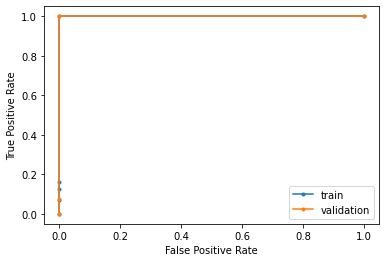

In [32]:
#roc curve
import matplotlib.pyplot as plt
print('ROC CURVE')

# Compute probabilities for training set
train_probs = reg.predict_proba(x_train)
train_probs1 = train_probs[:, 1]

# Compute ROC curve for training set
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_probs1, pos_label=1)

# Compute probabilities for test set
test_probs = reg.predict_proba(x_test)
test_probs1 = test_probs[:, 1]

# Compute ROC curve for test set
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_probs1, pos_label=1)

# Plot ROC curves
plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
#species: penguin species (Chinstrap, Adélie, or Gentoo)
#bill_length_mm: culmen length (mm)
#bill_depth_mm: culmen depth (mm)
#flipper_length_mm: flipper length (mm)
#body_mass_g: body mass (g)
#island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
#sex: penguin sex